In [1]:
import matplotlib

In [2]:
%matplotlib widget

In [3]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import fitstools
from pathlib import PurePath
import glob
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from astropy.io.fits import getheader
from balltracking import mballtrack as mblt
# from cython_modules import interp

plt.rcParams.update({'font.size': 12})
dpi = 168

In [4]:
datadir = PurePath('C:\Data\STEREO\L7tum\prep_fits')
outputdir = PurePath('C:\Data\STEREO\L7tum\\figures')
datafiles = sorted(glob.glob(str(PurePath(datadir, '*.fits'))))
nfiles = len(datafiles)
nfiles2 = 200
print(nfiles, datafiles[0])

200 C:\Data\STEREO\L7tum\prep_fits\prep_0000.fits


In [5]:
DTYPE = np.float32
def prep_data(image):
    image2 =np.abs(image)
    image3 = image2.max() - image2
    surface = (image3 - image3.mean())/image3.std()
    return surface.copy(order='C').astype(DTYPE)

(659, 3600)


(0.0, 250.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
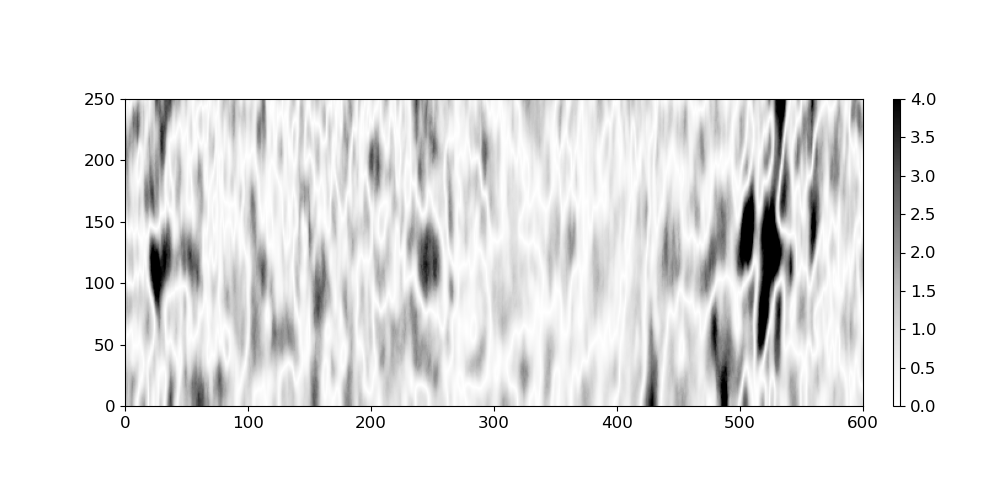

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
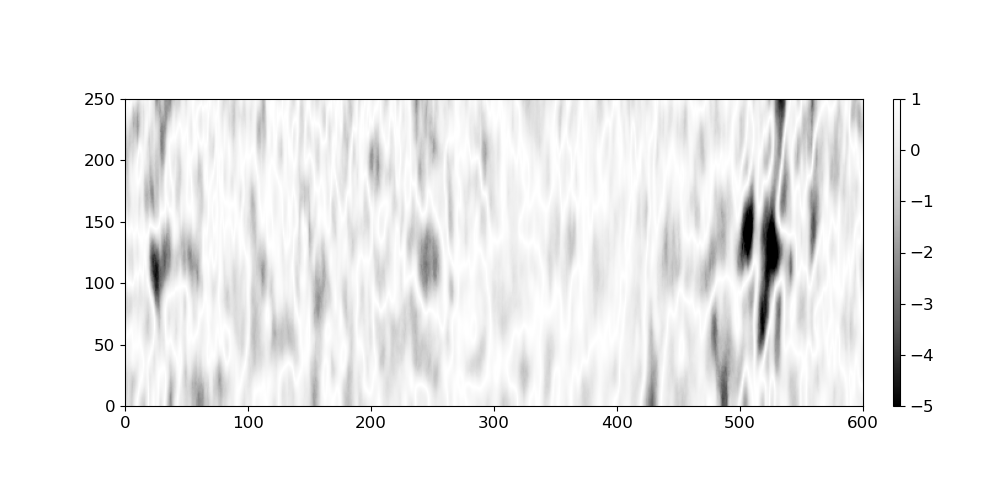

In [7]:
sample = np.abs(fitstools.fitsread(datafiles[0], cube=False, astropy=True))
print(sample.shape)
surface = prep_data(sample)
vmin = -5
vmax = 1

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
im = axs.imshow(sample, vmin=0, vmax=4, origin='lower', cmap='Greys')
# position for the colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(im, cax = cax)
axs.set_xlim([0, 600])
axs.set_ylim([0, 250])

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
im = axs.imshow(surface, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys_r')
# position for the colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(im, cax = cax)
axs.set_xlim([0, 600])
axs.set_ylim([0, 250])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
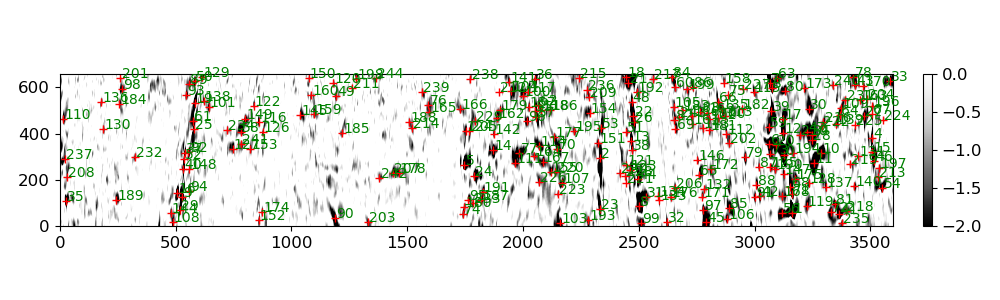

In [8]:
plt.close('all')
mbt_dict = {"nt":80,
            "rs":4,
            "am":1,
            "dp":0.3,
            "tdx":1,
            "tdy":100,
            "zdamping":1,
            "ballspacing":15,
            "intsteps":20,
            "mag_thresh":3.5,
            "noise_level":1,
            "track_emergence":False,
            "prep_function":prep_data,
            "datafiles":datafiles,
            "do_plots":False,
            "astropy":True,
            "fig_dir":PurePath(datadir, 'figures')}

# mbt_p, mbt_n = mblt.mballtrack_main(**mbt_dict)

mbt = mblt.MBT(polarity=1, **mbt_dict)

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10,3))
im = axs.imshow(mbt.surface, vmin = -2, vmax=0, origin='lower', cmap='Greys_r')
# position for the colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(im, cax = cax)

axs.plot(mbt.xstart, mbt.ystart, 'r+')
labels = np.arange(0, mbt.nballs)
labels_str = [str(l) for l in labels]
for i, l in enumerate(labels_str):
    axs.text(mbt.xstart[i]+5, mbt.ystart[i], l, color='green', fontsize=10)

plt.tight_layout()
# bmask = mbt.ystart <= 300
# axs.plot(mbt.xstart[bmask], mbt.ystart[bmask], 'co', ms=10, markerfacecolor='none')

In [9]:
mbt.track_all_frames()

Frame n=0: C:\Data\STEREO\L7tum\prep_fits\prep_0000.fits
Frame n=1: C:\Data\STEREO\L7tum\prep_fits\prep_0001.fits
Frame n=2: C:\Data\STEREO\L7tum\prep_fits\prep_0002.fits
Frame n=3: C:\Data\STEREO\L7tum\prep_fits\prep_0003.fits
Frame n=4: C:\Data\STEREO\L7tum\prep_fits\prep_0004.fits
Frame n=5: C:\Data\STEREO\L7tum\prep_fits\prep_0005.fits
Frame n=6: C:\Data\STEREO\L7tum\prep_fits\prep_0006.fits
Frame n=7: C:\Data\STEREO\L7tum\prep_fits\prep_0007.fits
Frame n=8: C:\Data\STEREO\L7tum\prep_fits\prep_0008.fits
Frame n=9: C:\Data\STEREO\L7tum\prep_fits\prep_0009.fits
Frame n=10: C:\Data\STEREO\L7tum\prep_fits\prep_0010.fits
Frame n=11: C:\Data\STEREO\L7tum\prep_fits\prep_0011.fits
Frame n=12: C:\Data\STEREO\L7tum\prep_fits\prep_0012.fits
Frame n=13: C:\Data\STEREO\L7tum\prep_fits\prep_0013.fits
Frame n=14: C:\Data\STEREO\L7tum\prep_fits\prep_0014.fits
Frame n=15: C:\Data\STEREO\L7tum\prep_fits\prep_0015.fits
Frame n=16: C:\Data\STEREO\L7tum\prep_fits\prep_0016.fits
Frame n=17: C:\Data\STER

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
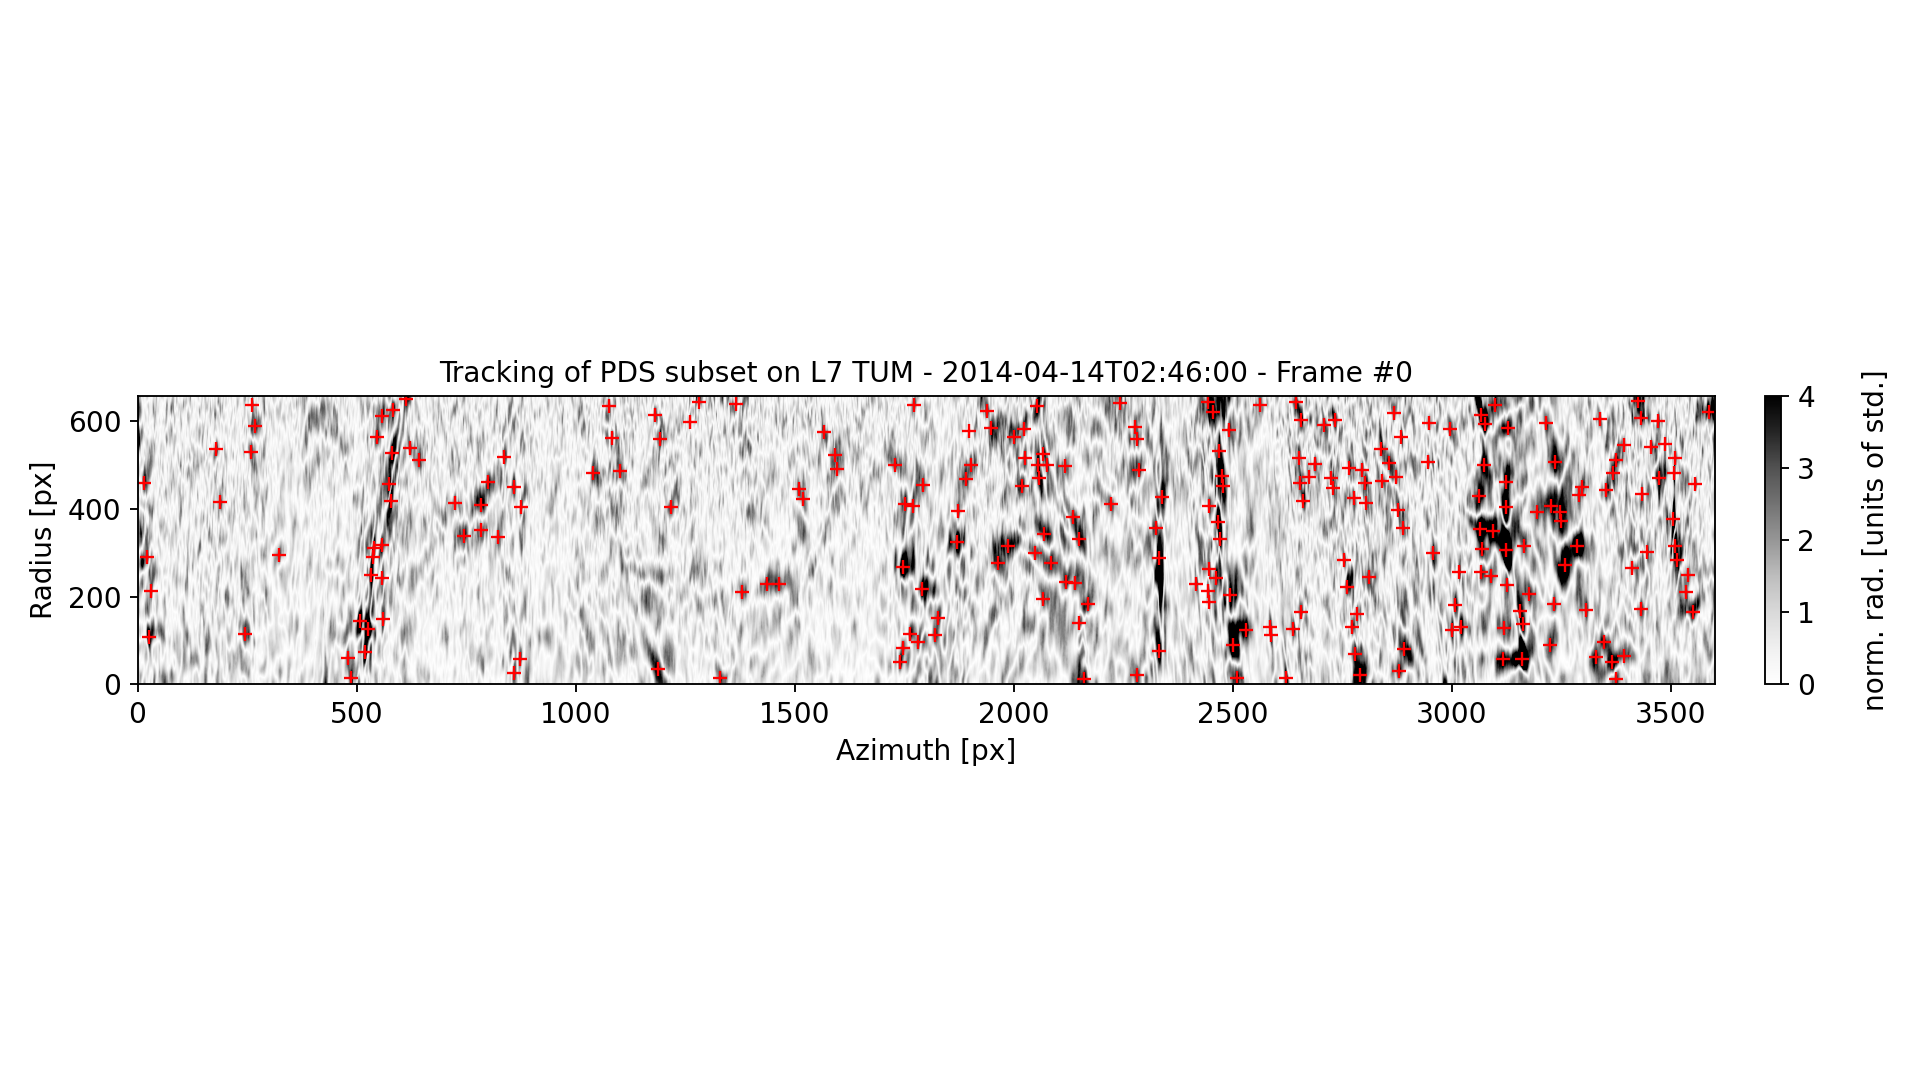

In [11]:
plt.close('all')
vmin = 0
vmax = 4
datafiles0 = sorted(glob.glob(str(PurePath('C:\Data\STEREO\L7tum','*.fts.gz'))))

for i in range(0, 1):

    sample = np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))
    _, hdr = fitstools.fitsread(datafiles0[i], cube=False, astropy=True, header=True)
    surface = prep_data(sample)

    fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(1920/dpi, 1080/dpi), dpi=dpi)
    im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
    # position for the colorbar
    divider = make_axes_locatable(axs)
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # Adding the colorbar
    cbar = plt.colorbar(im, cax = cax)
    cax.set_ylabel('norm. rad. [units of std.]', fontsize=12, labelpad=20)
    # axs.plot(mbt.ballpos[0,b,i], mbt.ballpos[1,b,i], 'r+')
    axs.plot(mbt.ballpos[0,:,i], mbt.ballpos[1,:,i], 'r+')
    # for ball, l in enumerate(labels_str):
    #     axs.text(mbt.ballpos[0, ball, i]+5, mbt.ballpos[1, ball, i], l, color='green')

    axs.set_xlim([0, 3600])
    axs.set_ylim([0, 659])
    date_obs = hdr['DATE-OBS'][:-4]
    axs.set_title(f'Tracking of PDS subset on L7 TUM - {date_obs} - Frame #{i}', fontsize=12)
    axs.set_xlabel('Azimuth [px]')
    axs.set_ylabel('Radius [px]')
    
    plt.tight_layout()

    # fig.savefig(PurePath(outputdir, f'Balltrack_L7tum_{i:04d}.jpg'), dpi=dpi) #
    # plt.close()

In [19]:
plt.close('all')
vmin = 0
vmax = 4
datafiles0 = sorted(glob.glob(str(PurePath('C:\Data\STEREO\L7tum','*.fts.gz'))))

for i in range(0, 78):

    sample = np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))
    _, hdr = fitstools.fitsread(datafiles0[i], cube=False, astropy=True, header=True)
    surface = prep_data(sample)
    
    xmax, ymax = mblt.get_local_extrema(sample, 1, 10, 3)

    fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(1920/dpi, 1080/dpi), dpi=dpi)
    im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
    # position for the colorbar
    divider = make_axes_locatable(axs)
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # Adding the colorbar
    cbar = plt.colorbar(im, cax = cax)
    cax.set_ylabel('norm. rad. [units of std.]', fontsize=12, labelpad=20)
    # axs.plot(mbt.ballpos[0,b,i], mbt.ballpos[1,b,i], 'r+')
    axs.plot(mbt.ballpos[0,:,i], mbt.ballpos[1,:,i], 'r+')
    # for ball, l in enumerate(labels_str):
    #     axs.text(mbt.ballpos[0, ball, i]+5, mbt.ballpos[1, ball, i], l, color='green')
    
    # Plot local max
    axs.plot(xmax, ymax, 'go', markerfacecolor='none')

    axs.set_xlim([0, 3600])
    axs.set_ylim([0, 659])
    date_obs = hdr['DATE-OBS'][:-4]
    axs.set_title(f'Tracking of PDS subset on L7 TUM - {date_obs} - Frame #{i}', fontsize=12)
    axs.set_xlabel('Azimuth [px]')
    axs.set_ylabel('Radius [px]')
    
    plt.tight_layout()

    fig.savefig(PurePath(outputdir, f'Balltrack_local_max_L7tum_{i:04d}.jpg'), dpi=dpi) #
    plt.close()